<h1>Exploring Dracula by Bram Stoker</h1>

<h2>Introduction</h2>

<p>One of the best classic books in horror is Bram Stoker's Dracula, where one of the protagonists visits a castle owned by the famed unseen host named Count Dracula. This project will perform basic analysis of the book using NLP techniques on the characters. The source of data will come from Project Gutenberg with the link below. 

[Gutenberg Book](https://www.gutenberg.org/ebooks/345)

In [1]:
import spacy
import re
from spacy.tokenizer import Tokenizer
from collections import Counter

<h2>Data Cleaning</h2>

<p> First we clean the data, by removing two special characters -, and _, because they are falsely classified by spaCy as part of the word. 

In [2]:
def clean_data():
    temp_data = open('Dracula-Bram-Stoker.txt', 'r', encoding='UTF-8').read().split()
    temp_data = [word.replace('_', ' ') for word in temp_data]
    temp_data = [word.replace('-', ' ') for word in temp_data]
    temp_data = [''.join(word) for word in temp_data]
    temp_data = ' '.join(temp_data)
    return temp_data

data = clean_data()

In [3]:
nlp = spacy.load('en_core_web_sm')
nlp.max_length = 1500000
data_token = nlp(str(data))

<h2>Character Occurence</h2>

<p>This section will investigate the character occurence in the data and explore if there are any interesting information we can extract. There were two methods that were employed.

<ul>
    <li>Look for person entities and see how many times they are mentioned in the text.</li>
    <li>Look for all the proper nouns and see how many times they occur.</li>
</ul>

In [4]:
def character_occurence(character_lookup):
    
    if character_lookup == 1:
        characters = Counter()
        for entity in data_token.ents:
            if entity.label_ == 'PERSON':
                characters[entity.lemma_] += 1
        return characters.most_common()
    
    if character_lookup == 2:
        characters1 = Counter()
        for token in data_token:
            if token.pos_ == 'PROPN':
                characters1[token.lemma_] += 1
        return characters1.most_common()


print('Person entities.')
print(character_occurence(1)[:20])
print('\n', 'Proper nouns.')
print(character_occurence(2)[:20])

Person entities.
[('Van Helsing', 283), ('Lucy', 279), ('Arthur', 134), ('Harker', 109), ('Jonathan', 100), ('Seward', 79), ('Mina', 76), ('Quincey', 53), ('Madam Mina', 50), ('Morris', 49), ('Renfield', 45), ('John', 43), ('Count', 37), ("Van Helsing's", 21), ('Dracula', 20), ('Westenra', 20), ('Quincey Morris', 20), ('Hawkins', 17), ('Godalming', 12), ('Lucy Westenra', 11)]

 Proper nouns.
[('Van', 317), ('Helsing', 312), ('Lucy', 298), ('Mina', 229), ('Jonathan', 200), ('Count', 191), ('Dr.', 178), ('God', 175), ('Professor', 171), ('Harker', 158), ('Arthur', 146), ('Seward', 126), ('Mr.', 103), ('Madam', 93), ('Mrs.', 90), ('Godalming', 88), ('Quincey', 84), ('Lord', 77), ('Morris', 77), ('John', 74)]


<p>The first list clearly has mistakes; it often double counted some of the characters, Quincey morris and Quincey P. Morris are the same person but is recognised differently. The second method also has some silly mistakes even if the first 20 doesn't show it. So we'll create a function called character_plotter to group these names that belong to each characterand plot them onto the graph and compare the two methods to visualise the numbers more efficently.

<AxesSubplot:>

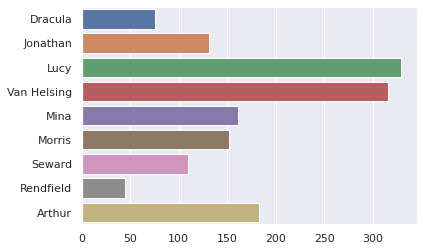

In [5]:
import seaborn as sns

sns.set_theme(style='darkgrid')

character_dict = {'Dracula': ['Count', 'Dracula'],
                  'Jonathan': ['Jonathan', 'Mr. Harker'],
                  'Lucy': ['Lucy', 'Westenra'],
                  'Van Helsing': ['Van Helsing', 'Professor'],
                  'Mina': ['Mina', 'Mrs. Harker', 'Murray'],
                  'Morris': ['Morris', 'Quincey'],
                  'Seward': ['John Seward', 'Jack', 'Seward'],
                  'Rendfield': ['Renfield'],
                  'Arthur': ['Holmwood', 'Art', 'Godalming']}


def character_plotter(char_occur_count):
    characters = Counter()
    temp_dict_names = char_occur_count
    temp_data_names = {key.lower(): value for key, value in temp_dict_names.items()}

    for keys, values in character_dict.items():
        for names in values:
            for char_names in temp_dict_names.keys():
                if names.lower() in char_names.lower():
                    characters[keys] += temp_dict_names[char_names]
    
    return characters

data_plot = character_plotter(dict(character_occurence(1)))
names = list(data_plot.keys())
name_occurence = [values for key, values in data_plot.items()]

sns.barplot(x=name_occurence, y=names)

<p> There are some limitations to this however, for instance we're relying on the spaCy module identifying every character correctly and counting them appropriately (which unfortunately, as advanced as spaCy is, it still cannot do without a CNN/RNN pipeline). 

Jonathan Harker might have been mentioned more than what the graph is showing but because the word 'Harker' is both used by Jonathan and Mina later on, we risk counting them twice. Arthur would have been mentioned a lot more as well, as he is sometimes addressed as 'Lord' - a term which is also used to refer to Jonathan and the Christian god. Arthur is also mentioned the same way as his dad as 'Lord Godalming'.Additionally Mina is also sometimes called Wilhemina but it occurence is rare enough that it didn't affect the data too much.

Lucy's high occurence could also be due to the fact that the main protagonists (Jonathan Harker/Mina Harker) often have dialog where they refer to their friend Lucy when talking.

<AxesSubplot:>

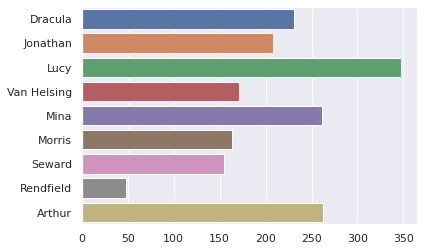

In [6]:
import seaborn as sns

sns.set_theme(style='darkgrid')

def character_plotter(char_occur_count):
    characters = Counter()
    temp_dict_names = char_occur_count
    temp_data_names = {key.lower(): value for key, value in temp_dict_names.items()}

    for keys, values in character_dict.items():
        for names in values:
            for char_names in temp_dict_names.keys():
                if names.lower() in char_names.lower():
                    characters[keys] += temp_dict_names[char_names]
    
    return characters

data_plot2 = character_plotter(dict(character_occurence(2)))
names = list(data_plot2.keys())
name_occurence2 = [values for key, values in data_plot2.items()]

sns.barplot(x=name_occurence2, y=names)

<p>The second method have shown significant increase in the number of character occurences for all characters listed with the exception of Van Helsing. The reason for this is the result of how the character_plotter works; it counted all the proper nouns listed, then combines the result of two proper nouns if the key names belong to the same character (i.e. Count and  Dracula belong to the character Dracula and so the number of occurences for the word Count is piled on to the number of occurences for word Dracula). This results in double counting as the two words can sometimes appear in the same sentence (e.g.  ' "The Whitby Gazette," of which I had made cuttings, helped us to understand the
terrible events at Whitby when Count Dracula landed ' ) which sould only be counted as a single occurence since it refers to the same character using their full name.

<p> Similarly, Van Helsing's decrease in occurence is also the product of the function character_plotter; the word "van" and "Helsing" has been separated in the second method used (counting the proper nouns). The function has "Van Helsing" as a key word to detect his occurence in text which was useful for avoiding double counting using the first method, but with second method; the function didn't recognise both words as the function counts occurences by checking if a certain word cotains the key names listed for each character (e.g. Count and Dracula are the key names for Dracula, etc..) Van Helsing has been detected to not contained in the word 'Van' alone. This resulted in undercounting the occurence.

<p>Below is the comparison of the two graphs.

<AxesSubplot:>

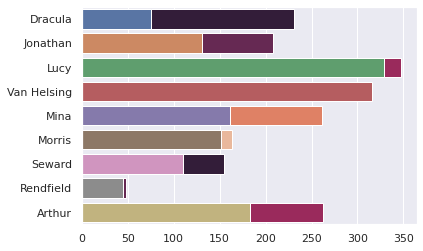

In [7]:
sns.barplot(x=name_occurence2, y=names, palette=sns.color_palette('rocket'))
sns.barplot(x=name_occurence, y=names)

<h2>Character Informations</h2>

<p>We can also explore the adjectives used to describe our characters in the book using spaCy

In [8]:
def character_info(data_token, character):
    temp_adjs = []
    adjectives = []
    text = data_token

    for ent in text:
        if ent.lemma_ in character and len(ent.lemma_) >= 3:
            [temp_adjs.append(token.lemma_) for token in ent.subtree if token.dep_ == 'amod']

    for ent in text.ents:
        if ent.lemma_ == character and ent.root.dep_ == 'nsubj':
            [temp_adjs.append(child.lemma_) for child in ent.root.children if child.dep_ == 'acomp']

    [adjectives.append(adjs) for adjs in temp_adjs if adjs not in adjectives]

    return adjectives


info_plot = {keys: [] for keys, values in character_dict.items()}

for keys, values in character_dict.items():
    for names in values:
        if character_info(data_token, names):
            info_plot[keys] += (character_info(data_token, names))

print(info_plot)

{'Dracula': ['fearful', 'great', 'very', 'bind'], 'Jonathan': ['live', 'unnatural', 'horrible', 'awful', 'other', 'same', 'usual', 'ill', 'previous', 'excellent', 'old', 'rich', 'good', 'poor', 'dear', 'whole', 'fearful', 'long', 'human', 'mortal', 'own', 'well', 'interesting', 'wonderful', 'pierce', 'die', 'quick', 'poor', 'alone', 'round'], 'Lucy': ['dear', 'poor', 'sad', 'dead', 'unequalled', 'false', 'true', 'sweet', 'late'], 'Van Helsing': ['sweet', 'gentle', 'remorseless', 'dear', 'instant', 'kind', 'great', 'little', 'black', 'usual', 'different', 'good', 'old', 'pierce', 'die', 'agonised', 'same', 'careful', 'old'], 'Mina': ['dear', 'wonderful', 'sweet', 'poor', 'die', 'young', 'awake', 'wonderful', 'pierce', 'die', 'quick', 'poor', 'alone', 'round', 'flicker', 'own', 'drive', 'white', 'holy', 'dear'], 'Morris': ['instinctive', 'certain', 'other'], 'Seward': ['proper', 'remorseless', 'lunatic', 'strong', 'good', 'poor', 'dear', 'ard', 'distant', 'dear', 'proper', 'remorseless',

<p> There are some fascinating insights that we can gather from analysing the character's descriptions, with Van Helsing being old and remorseless but also sweet and gentle, but otherwise most of the results are surprisingly insightful despite the current limitations of NLP.

<h3>Word Count Per Word Types</h3>
<p> We can gleam the author's writing style by listing the most used words and categorising them to whatever word type they are. 

In [9]:
from spacy.lang.en.stop_words import STOP_WORDS

tag_list = ['PROPN', 'ADJ', 'ADP', 'PRON', 'ADV', 'NOUN', 'VERB']

en_stop = STOP_WORDS

for items in tag_list:
    words = [token.lemma_ for token in data_token if token.pos_ == items and token.lemma_ not in en_stop]
    words_count = Counter(words)
    print(items, words_count.most_common(10))

PROPN [('Van', 317), ('Helsing', 312), ('Lucy', 298), ('Mina', 229), ('Jonathan', 200), ('Count', 191), ('Dr.', 178), ('God', 175), ('Professor', 171), ('Harker', 158)]
ADJ [('good', 266), ('great', 195), ('poor', 190), ('old', 187), ('dear', 168), ('little', 167), ('white', 103), ('terrible', 100), ('long', 94), ('strange', 93)]
ADP [('like', 238), ('lest', 38), ('outside', 19), ('round', 19), ('past', 13), ('opposite', 5), ('away', 5), ('forth', 5), ('amid', 4), ('afore', 4)]
PRON [('I', 6304), ('yer', 9), ('everybody', 4), ('anybody', 3), ("'em", 2), ('isself', 2), ('hisself', 1)]
ADV [('away', 185), ('far', 112), ('long', 72), ('soon', 69), ('later', 69), ('suddenly', 52), ('evidently', 50), ('simply', 47), ('home', 46), ('round', 35)]
NOUN [('time', 442), ('man', 402), ('night', 329), ('hand', 311), ('day', 274), ('thing', 271), ('room', 253), ('way', 249), ('door', 212), ('friend', 210)]
VERB [('come', 781), ('know', 591), ('look', 410), ('tell', 377), ('think', 354), ('find', 27

<p> Nothing unexpected results either here, "I" is the most used word in the English language, the second and third word are far more interesting "come" and "time", especially since the story is about an immortal charming vampire that lures his victim to a trap.

<h2>Common Collocations</h2>

<p>Collocations are certain words that has an unexpected occurence rate in sentences. It's a great tool in analysing a text because collocations are usually what makes a sentence sound natural. In English, these sentences include 'strong tea', 'bad blood', 'sharp tongue' etc. This is different from idioms which are words that when taken together forms an expression and unlike collocations; when tyaken literally can't be easilly understood.

Evolution of language also means change in common collocations and by analysing these, we can gleam onto how people may have talked in a certain time period. In this case, annalysing the common collocations in Bram Stoker's Dracula indicate the common collocations used in his time. 

There are 5 main forms of collocations that we'll try to analyse:
<ul>
    <li> adjective + noun </li>
        <p>e.g. (big mistakes, heavy rain, rich/wealthy people, strong wind)
    <li> noun + noun </li>
        <p>e.g. (danger zone, school day, desk job)
    <li> verb + noun </li>
        <p>e.g. (pay attention, take notes, runny nose)
    <li> adverb + adjective </li>
        <p>e.g. (utterly stupid, highly unusual, deeply disturbing)
    <li> verb + adverb </li>
        <p>e.g. (rise steadily, drop dead, refuse flatly)
</ul>

In [10]:
from nltk import collocations, ngrams
import nltk

bigram_measures = collocations.BigramAssocMeasures()
trigram_measures = collocations.TrigramAssocMeasures()

bi_finder = collocations.BigramCollocationFinder.from_words(data_token)
tri_finder = collocations.TrigramCollocationFinder.from_words(data_token)

found_bigrams = sorted(bi_finder.nbest(bigram_measures.raw_freq, 30))
found_trigrams = sorted(tri_finder.nbest(trigram_measures.raw_freq, 30))

print(found_bigrams)
print(found_trigrams)

[(DRACULA, DRACULA), (DRACULA,  ), ( , by), (by,  ), ( , Bram), (Bram, Stoker), (Stoker, [), ([, Illustration), (Illustration, :), (:, colophon), (colophon, ]), (], NEW), (NEW, YORK), (YORK, GROSSET), (GROSSET, &), (&, DUNLAP), (DUNLAP,  ), ( , Publishers), (Publishers,  ), ( , Copyright), (Copyright, ,), (,, 1897), (1897, ,), (,, in), (in, the), (the, United), (United, States), (States, of), (of, America), (America, ,)]
[(DRACULA, DRACULA,  ), (DRACULA,  , by), ( , by,  ), (by,  , Bram), ( , Bram, Stoker), (Bram, Stoker, [), (Stoker, [, Illustration), ([, Illustration, :), (Illustration, :, colophon), (:, colophon, ]), (colophon, ], NEW), (], NEW, YORK), (NEW, YORK, GROSSET), (YORK, GROSSET, &), (GROSSET, &, DUNLAP), (&, DUNLAP,  ), (DUNLAP,  , Publishers), ( , Publishers,  ), (Publishers,  , Copyright), ( , Copyright, ,), (Copyright, ,, 1897), (,, 1897, ,), (1897, ,, in), (,, in, the), (in, the, United), (the, United, States), (United, States, of), (States, of, America), (of, America

In [11]:
bigrams  = ngrams(data_token, 2)
counted_bigrams = Counter(bigrams).most_common(30)

trigrams = ngrams(data_token, 3)
counted_trigrams = Counter(trigrams).most_common(30)

print(counted_bigrams)
print(counted_trigrams)

[((DRACULA, DRACULA), 1), ((DRACULA,  ), 1), (( , by), 1), ((by,  ), 1), (( , Bram), 1), ((Bram, Stoker), 1), ((Stoker, [), 1), (([, Illustration), 1), ((Illustration, :), 1), ((:, colophon), 1), ((colophon, ]), 1), ((], NEW), 1), ((NEW, YORK), 1), ((YORK, GROSSET), 1), ((GROSSET, &), 1), ((&, DUNLAP), 1), ((DUNLAP,  ), 1), (( , Publishers), 1), ((Publishers,  ), 1), (( , Copyright), 1), ((Copyright, ,), 1), ((,, 1897), 1), ((1897, ,), 1), ((,, in), 1), ((in, the), 1), ((the, United), 1), ((United, States), 1), ((States, of), 1), ((of, America), 1), ((America, ,), 1)]
[((DRACULA, DRACULA,  ), 1), ((DRACULA,  , by), 1), (( , by,  ), 1), ((by,  , Bram), 1), (( , Bram, Stoker), 1), ((Bram, Stoker, [), 1), ((Stoker, [, Illustration), 1), (([, Illustration, :), 1), ((Illustration, :, colophon), 1), ((:, colophon, ]), 1), ((colophon, ], NEW), 1), ((], NEW, YORK), 1), ((NEW, YORK, GROSSET), 1), ((YORK, GROSSET, &), 1), ((GROSSET, &, DUNLAP), 1), ((&, DUNLAP,  ), 1), ((DUNLAP,  , Publishers), 

<p>There doesn't seem to be a common collocation in the text as every detected collocation by nltk occurs exactly once, of course, there may be more collocations in the text that were not detected by our library.

In [12]:
two_nouns = []
adj_noun = []
verb_noun = []
adverb_adj = []
verb_adverb = []

def custom_collocations():

    temp_data = [pair for pair in zip(data_token[:-1], data_token[1:])]

    for word1, word2 in temp_data:
        if word1.pos_ == 'NOUN' and word2.pos_ == 'NOUN':
            two_nouns.append((word1.text.lower(), word2.text.lower()))
    
    for word1, word2 in temp_data:
        if word1.pos_ == 'ADJ' and word2.pos_ == 'NOUN':
            adj_noun.append((word1.text.lower(), word2.text.lower()))
    
    for word1, word2 in temp_data:
        if word1.pos_ == 'VERB' and word2.pos_ == 'NOUN':
            verb_noun.append((word1.text.lower(), word2.text.lower()))

    for word1, word2 in temp_data:
        if word1.pos_ == 'ADV' and word2.pos_ == 'ADJ':
            adverb_adj.append((word1.text.lower(), word2.text.lower()))
    
    for word1, word2 in temp_data:
        if word1.pos_ == 'VERB' and word2.pos_ == 'ADV':
            verb_adverb.append((word1.text.lower(), word2.text.lower()))


custom_collocations()

print(Counter(two_nouns).most_common(10))
print(Counter(adj_noun).most_common(10))
print(Counter(verb_noun).most_common(10))
print(Counter(adverb_adj).most_common(10))
print(Counter(verb_adverb).most_common(10))

[(('dining', 'room'), 13), (('child', 'brain'), 9), (('morrow', 'night'), 8), (('hall', 'door'), 8), (('p.', 'm.'), 7), (('warning', 'hand'), 7), (('note', 'book'), 6), (('drawing', 'room'), 6), (('earth', 'box'), 6), (('window', 'sill'), 5)]
[(('last', 'night'), 47), (('few', 'minutes'), 22), (('old', 'man'), 20), (('poor', 'fellow'), 14), (('poor', 'dear'), 14), (('same', 'time'), 13), (('own', 'room'), 12), (('such', 'things'), 11), (('old', 'fellow'), 11), (('white', 'teeth'), 10)]
[(('take', 'care'), 11), (('winding', 'stair'), 4), (('caught', 'sight'), 4), (('shook', 'hands'), 4), (('have', 'time'), 4), (('gave', 'way'), 4), (('have', 'work'), 4), (('made', 'search'), 3), (('took', 'place'), 3), (('lost', 'sight'), 3)]
[(('so', 'much'), 25), (('so', 'many'), 18), (('so', 'sweet'), 13), (('too', 'much'), 13), (('all', 'right'), 11), (('so', 'good'), 10), (('too', 'late'), 10), (('so', 'great'), 9), (('so', 'small'), 9), (('so', 'strange'), 8)]
[(('came', 'back'), 22), (('be', 'so'

<p> Here we can see some mistakes but it does bring slightly better results than nltk (e.g. came away, few minutes, take care... etc which nltk didn't find). It also didn't count ones that are separated in a sentence, so the number of collocations are severely reduced than if one were to count each one per sentence. On the other hand this is also significantly faster than reading the whole book and tallying each collocation. Trigrams are much harder to take into account, and the likelihood that a combination of words appearing in the same sentence is a coincidence would be higher and therefore less accurate. 

<h3>Wordcloud Dracula</h3>
<p>Wordclouds are conventionally described to be fun in showing some of the important words from the text.

[Source](https://depositphotos.com/470030206/stock-illustration-dracula-nosferatu-vampire-icon-solid.html?utm_medium=affiliate&utm_source=widget&utm_campaign=sp.depositphotos.com&utm_term=4&utm_content=33083) for the mask

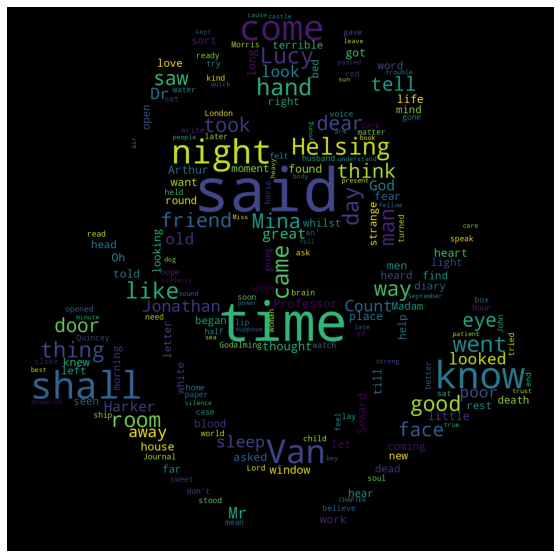

In [13]:
from wordcloud import WordCloud
from imageio import imread
import matplotlib.pyplot as plt

bat_mask = imread('mask.jpg')
wordcloud = WordCloud(max_font_size=None, mask=bat_mask, stopwords=en_stop,
                      collocations=False, background_color='black').generate(str(data_token))

plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

<h3>Summarsation</h3>
<p> 

In [14]:
def most_common_words(data_token, n=20):
    pos_tag = ['NOUN', 'ADJ', 'PROP', 'VERB', 'ADV']
    words = [token.lemma_ for token in data_token if token.pos_ in pos_tag and token.lemma_ not in en_stop]
    words_count = Counter(words)
    return words_count.most_common(n)

common_words = most_common_words(data_token)
print('most common words')
print(common_words,'\n')

norm_freq_words = {common_words[words][0]: (common_words[words][1] / common_words[0][1]) for words in range(len(common_words))}
print('normalised frequency of most common words')
print(norm_freq_words,'\n')


most common words
[('come', 781), ('know', 592), ('look', 469), ('time', 442), ('man', 404), ('tell', 379), ('think', 355), ('hand', 336), ('night', 330), ('good', 289), ('day', 275), ('find', 272), ('thing', 271), ('sleep', 265), ('room', 253), ('way', 249), ('ask', 233), ('dear', 219), ('face', 217), ('door', 212)] 

normalised frequency of most common words
{'come': 1.0, 'know': 0.7580025608194623, 'look': 0.6005121638924455, 'time': 0.5659411011523687, 'man': 0.5172855313700384, 'tell': 0.4852752880921895, 'think': 0.45454545454545453, 'hand': 0.43021766965428937, 'night': 0.4225352112676056, 'good': 0.3700384122919334, 'day': 0.352112676056338, 'find': 0.34827144686299616, 'thing': 0.34699103713188223, 'sleep': 0.3393085787451985, 'room': 0.323943661971831, 'way': 0.31882202304737517, 'ask': 0.29833546734955185, 'dear': 0.28040973111395645, 'face': 0.27784891165172854, 'door': 0.2714468629961588} 



<p>The next step is to weigh the sentences based on the frequency of each word. The sentences are weighted by their frequency of occurence in the text. The sentences are then sorted in descending order of their weight.


In [15]:
import json
weighted_sentences1 = {}

def weighing_sentences1():
    for sentences in data_token.sents:
        for word in sentences:
            if word.lemma_ in norm_freq_words:
                if sentences not in weighted_sentences1:
                    weighted_sentences1[sentences] = norm_freq_words[word.lemma_]
                else:
                    weighted_sentences1[sentences] += norm_freq_words[word.lemma_]
weighing_sentences1()
summary_result1 = Counter(weighted_sentences1).most_common(10)
summary_result1 = [sentence[0] for sentence in summary_result1]
print(summary_result1)

[But there are things old and new which must not be contemplate by men's eyes, because they know  or think they know  some things which other men have told them., If you, who saw the wounds on Lucy's throat, and saw the wounds so similar on the child's at the hospital; if you, who saw the coffin empty last night and full to day with a woman who have not change only to be more rose and more beautiful in a whole week, after she die  if you know of this and know of the white figure last night that brought the child to the churchyard, and yet of your own senses you did not believe, how, then, can I expect Arthur, who know none of those things, to believe?, She hadn't taken to visiting the churchyard till I came, and if she hadn't come there in the day time with me she wouldn't have walked there in her sleep; and if she hadn't gone there at night and asleep, that monster couldn't have destroyed her as he did., Just as I was beginning to hope that the mate would come out calmer  for I heard 

In [23]:
def weighing_sentences2(sentence1, sentence2):
    sentence1 = sentence1.text.split(' ')
    sentence2 = sentence2.text.split(' ')
    intersection = [word for word in sentence1 if sentence1 != sentence2 and word in sentence2]
    intersection = [word for word in intersection if word not in en_stop]
    normalised_weight = len(intersection) / ((len(sentence1) + len(sentence2))/ 2)

    return normalised_weight

sentences = list(data_token.sents)
matrix = [[weighing_sentences2(sentences[i], sentences[j]) for j in range(len(sentences))
          if weighing_sentences2(sentences[i], sentences[j]) > 0.8] 
          for i in range(len(sentences))]

matrix[:10]

In [22]:
scores = {sentences[i]: sum(matrix[i]) for i in range(len(matrix)) if matrix[i]}
print(Counter(scores).most_common(20))

[(I thought I would improve the occasion and learn something, so I asked him:   , 826.9034452986149), (I may err  I am but man; but I believe in all I do., 822.4022590949014), (I know I would if I were free  only I don't want to be free., 803.0621435705456), (I feel that I can hardly recall anything of the journey, except that I knew I was coming to Jonathan, and, that as I should have to do some nursing, I had better get all the sleep I could...., 774.6780267831302), (I wonder if we  I mean Jonathan and I  shall ever see them together., 747.9869355591245), (I hardly see this yet, but when I get at the dates I suppose I shall., 746.9279813951424), (" I thought I would push his analogy to its utmost logically, so I said quickly:   ", 746.4079655199567), (CHAPTER II JONATHAN HARKER'S JOURNAL   continued   5 May.   , 737.9077346537987), (I  I cannot go on  words  and  v voice  f fail m me!", 732.880880788715), (I did what I could to brighten them up, and I suppose that the effort did me g